# Project Report

### Brian Hart (U03130229) and Josh Surette (U78913048); 4/25/17
 
Brian and Josh's project focuses on working with Converse to help them better understand their project launches. Converse currently has a put a lot of weight into this understanding to expand their market and reach new target audiences.

To start with the analysis, we met with Converse representatives and tried to get an understanding of what their current product launch analysis was like. They currently employ a tool called Crimson Hexagon which has an ungodly amount of data stretching back years on Twitter, Instagram, and other social media outlets. With this tool, Converse is also able to put monitors on certain topics or accounts to contextualize social media data over a bunch of years regarding certain products/competitors. We had to learn a ton about how to use monitors, how to get data from this tool, and also had to shape our plans around this tool.

Given that this tool provides all of the basics of top tweeters, geographical analysis, and sentiment analysis we had to think outside of the box to give Converse something useful; something Crimson Hexagon doesnt already give them. One thing we noticed was that Crimson Hexagon was able to provide information about top tweeters, but didnt contextualize their influence. We decided to focus on this, and since Converse doesnt have official spokespeople for their campaigns, we wanted to create **POTENTIAL INFLUENCE NETWORKS** of each top user during each of the project launches. 

We started by first downloading a list of top users for the Chuck 2 sneaker from Crimson. These top users were defined as those that had the most retweets when they mentioned the Chuck 2 product. We downloaded a csv that contained all tweets about the product launch and filtered these tweets to grab the retweets of the top user; @rikerR5. 

We originally wanted to create a retweet network using this data with the Twitter API. However we ran into the following issues:

**Problem:** Twitters API treats retweets as one layer; there is no such thing as 'retweets of retweets'.

**Problem:** Twitters API also only goes back 1-3 weeks instead of the 2 years we would need for the Chuck 2.

From here we shifted instead to getting the first layer of our network as the **retweets** around the product launch. To understand the network influence we then decided to employ Klout score, which determines a users influence. The idea was, our high retweet individual would be more influential if the network that retweeted him was influential, and if the network that knows his retweeters is influential, it would make for a more succesful spread of product awareness. Thus, we designed the following algorithm:

### Influence Networks Algorithm
**1)** Retrieve a user in 1st level of crimson hexagon retweeters

**2)** Search through follower list

**3)** Calculate each users Klout score

**4)** If Klout score is >= 55, recursively call from step 2 on


This would allow us to get a robust influence network. However, as we used the Klout API, we realized the rate limit was horrible for our intensive analysis; 

**Problem:** Klouts API only allowed 20000 requests a day. 

Thus, we decided to rate users influence based on the number of followers they have, and filter out those who have less than 1000 followers. Another problem we had was with Twitters API retrieval limits:

**Problem:** Twitter only allows you to retrieve 100 followers in the followers list, which means we have a relatively random retrieval and not the best understanding of their network

**Problem:** Twitter also has a ridiculous 15 requests/15 minute limit, so we had to sleep 15 minutes every time we hit the rate limit, which makes data collection horrid.

Thus, we were able to get a final influence graph with analysis at the bottom for 3 layers (retweets, then influential followers of retweeters, then influential followers of the retweeters followers), but it took an entire day, and has some limitations as described above. However, we are really happy with what we have done, and consider it a success so far even though there is some stochastic nature to our data collection. 

We are currently in the process of comparing competitors successful launches and more product launches by Converse to ultimately correlate competitors success with potential influence network density. 

## Chuck 2 Converse Product Launch Network Analysis

In the following cells we employ a network analysis for the total landscape surrounding the Chuck 2 launch

In [31]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import json
from klout import *

In [166]:
chuck = pd.read_csv("chuckii_twitter.csv", encoding = "ISO-8859-1")
print(chuck.shape)
chuck.head()

(4852, 17)


,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following
0,625450197393506304,7/26/2015 19:38,http://twitter.com/AvriilR5/status/62545019739...,RT @rikerR5 Cannot wait to get a pair of these...,@AvriilR5,Kade,NaN,NaN,NaN,Purchase Intent,NaN,Twitter,36.0,M,3715,394,916
1,626396332106874880,7/29/2015 10:18,http://twitter.com/Nikkintense_/status/6263963...,Converse Chuck II #discount,@Nikkintense_,Nikki,Netherlands,NaN,NaN,Value for money,NaN,Twitter,36.0,F,48684,338,520
2,625949463362695168,7/28/2015 4:42,http://twitter.com/Mertyyy_/status/62594946336...,"#ChuckII the fudge, i want the black and whit...",@Mertyyy_,Merliza Tolentino,Philippines,NaN,NaN,Purchase Intent,NaN,Twitter,29.0,NaN,2578,146,200
3,626754272772788224,7/30/2015 10:00,http://twitter.com/_MieuKun_/status/6267542727...,Tui ch? b?n holiday c?a converse Chuck II ra r...,@_MieuKun_,_Miêu Miêu_,Vietnam,NaN,NaN,Value for money,NaN,Twitter,23.0,NaN,8374,121,298
4,626067239456886784,7/28/2015 12:30,http://twitter.com/MandiSilva99/status/6260672...,Chuck II,@MandiSilva99,-,Brazil,Distrito Federal,Brasilia,Value for money,NaN,Twitter,36.0,NaN,8273,289,189


In [3]:
retweeted = []
for row in range(0, len(chuck)):
    retweeted.append("")
    if chuck['Contents'][row].split()[0] == "RT":
        retweeted[-1] = (chuck['Contents'][row].split()[1])

chuck['retweeted'] = retweeted

In [4]:
chuck.head()

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following,retweeted
0,625450197393506304,7/26/2015 19:38,http://twitter.com/AvriilR5/status/62545019739...,RT @rikerR5 Cannot wait to get a pair of these...,@AvriilR5,Kade,NaN,NaN,NaN,Purchase Intent,NaN,Twitter,36.0,M,3715,394,916,@rikerR5
1,626396332106874880,7/29/2015 10:18,http://twitter.com/Nikkintense_/status/6263963...,Converse Chuck II #discount,@Nikkintense_,Nikki,Netherlands,NaN,NaN,Value for money,NaN,Twitter,36.0,F,48684,338,520,
2,625949463362695168,7/28/2015 4:42,http://twitter.com/Mertyyy_/status/62594946336...,"#ChuckII the fudge, i want the black and whit...",@Mertyyy_,Merliza Tolentino,Philippines,NaN,NaN,Purchase Intent,NaN,Twitter,29.0,NaN,2578,146,200,
3,626754272772788224,7/30/2015 10:00,http://twitter.com/_MieuKun_/status/6267542727...,Tui ch? b?n holiday c?a converse Chuck II ra r...,@_MieuKun_,_Miêu Miêu_,Vietnam,NaN,NaN,Value for money,NaN,Twitter,23.0,NaN,8374,121,298,
4,626067239456886784,7/28/2015 12:30,http://twitter.com/MandiSilva99/status/6260672...,Chuck II,@MandiSilva99,-,Brazil,Distrito Federal,Brasilia,Value for money,NaN,Twitter,36.0,NaN,8273,289,189,


In [5]:
# Most retweeted users
pd.crosstab(index=chuck["retweeted"], columns="count").sort_values(by = "count", axis=0, ascending = False).head(10)

col_0,count
retweeted,
,2708
@rikerR5,1292
@Kyle_JSimmons,180
@JackSWS,130
@SavedYouAClick,53
@ConverseID,48
@charmainedoble,43
@Converse,31
@PopiGames,24


In [6]:
adj_df = pd.crosstab(chuck.Author, chuck.retweeted)
idx = adj_df.columns.union(adj_df.index)
adj_df = adj_df.reindex(index = idx, columns = idx, fill_value = 0)
adj_df.shape

(4323, 4323)

### This is wrong!

I'm leaving this in just so that we know to look out for it next time, but we can see that the adjacency matrix below is wrong... it has a row and a column of tweets that were never retweeted by anyone, but configuring the matrix this way will make it appear that all tweets were retweeted by someone.

In [7]:
adj_df.head()

,,@00years,@0701Marianaa,@0mgstyls,@10Xmoisy,@1221lover_,@123Car1ssa,@143Macho_,@14kSarah,@15rcruz,...,@zacplateau,@zareehnuh,@zaynab2412,@zenzenla,@zixf171,@zoepingleyy,@zoeverborg,@zopfalzgraf,@zurisadaiam28,Kyle_JSimmons
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@00years,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0701Marianaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0mgstyls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@10Xmoisy,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
adj_mat = np.matrix(adj_df)
adj_mat

matrix([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

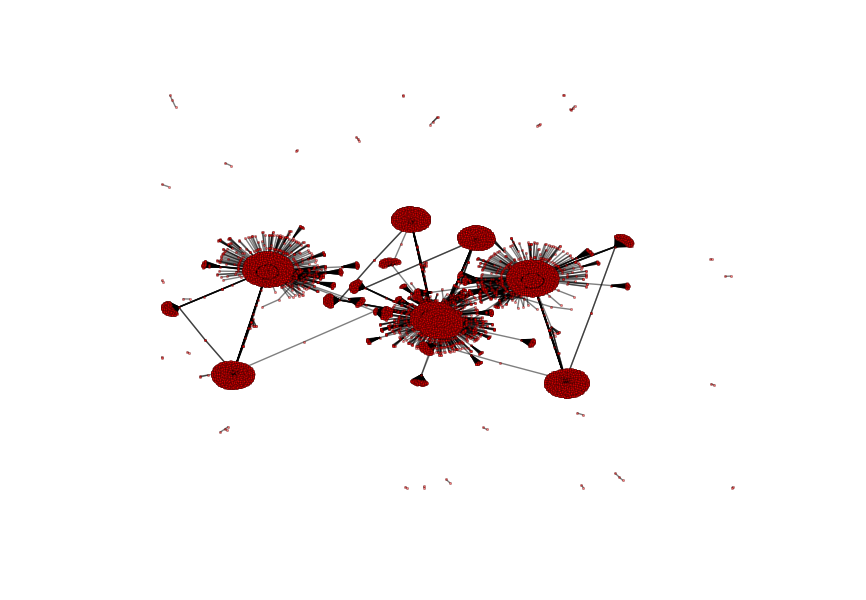

In [141]:
# we can see that lots of tweets are linked here even if they weren't retweets.
G = nx.from_numpy_matrix(adj_mat)
nx.draw(G, alpha=.5, node_size=3)
plt.show()
plt.savefig("misleading_graph.png", dpi=1000)

### This is right!

Below, I have removed the row and column of tweets that were never retweeted.  This is the right way to create the adjacency matrix.

In [9]:
# remove first column and row because these weren't retweeted
adj_df_rt = adj_df.iloc[1:len(adj_df), 1:len(adj_df)]
adj_df_rt.head()

,@00years,@0701Marianaa,@0mgstyls,@10Xmoisy,@1221lover_,@123Car1ssa,@143Macho_,@14kSarah,@15rcruz,@1731_victoria,...,@zacplateau,@zareehnuh,@zaynab2412,@zenzenla,@zixf171,@zoepingleyy,@zoeverborg,@zopfalzgraf,@zurisadaiam28,Kyle_JSimmons
@00years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0701Marianaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0mgstyls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@10Xmoisy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@1221lover_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# only retweeted
adj_mat_rt = np.matrix(adj_df_rt)
adj_mat_rt

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

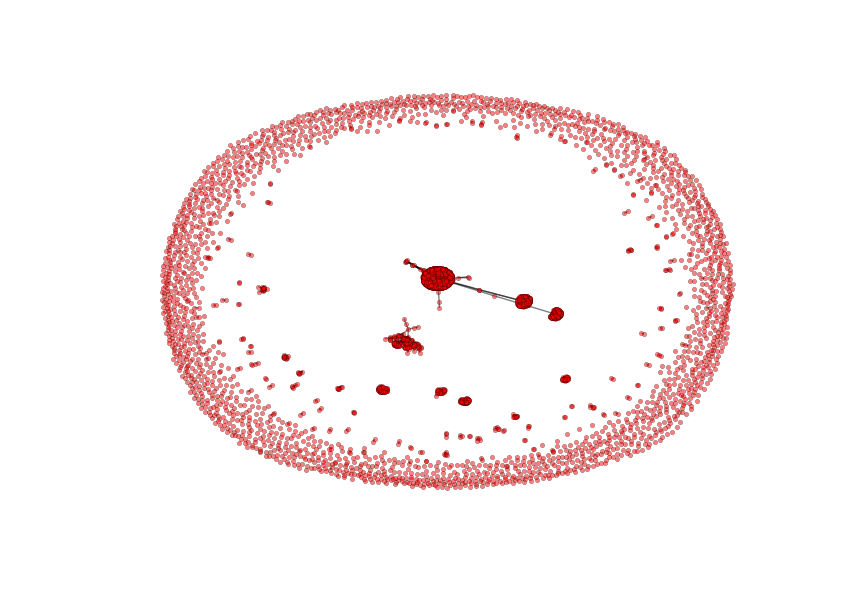

In [193]:
# only retweeted
G = nx.from_numpy_matrix(adj_mat_rt)
nx.draw(G, alpha=.5, node_size=10)
plt.show()
plt.savefig("graph.png", dpi=1000)

We can see that most tweets weren't retweeted.  In certain instances, some of the larger groups of retweets are linked by a small number of users.  Each node represents a tweet.  Larger clusters of nodes represent the same tweet that has been retweeted by many people.  It would be interesting to compare this graph with a similar graph from a different product launch.

---

## TWEEPY

Implementing the tweepy library (interface to twitter api):

In [11]:
#import tweepy

consumer_key = '8kqqyPcjvb1P75OO9rtzYopnB'
consumer_secret = '7WaHHBVvjrvPJLLdP5a0e7pb2oHqt5C5trHrRfd1pp8pQpf3aE'

access_token ='262429770-QcqtCDv6GZ1PUDjSRMbO9117ociCqc0a2Y9Cg9CE'
access_token_secret = 'ZHUXvN1UP7NvmvSZHn8Zp6Ap0EKeqHZhXzL7XZ9B5Z0Pd'

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


## Let's just look at users with high Klout Scores

In [167]:
chuck_high_klout = chuck[chuck["Klout Score"] > 65]
chuck_high_klout.head()

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following
77,625381874966237184,7/26/2015 15:07,http://twitter.com/SidewalkHustle/status/62538...,@KingRicharding Nice!! I'm glad we converted y...,@SidewalkHustle,Sidewalk Hustle,United States of America,NaN,NaN,Purchase Intent,NaN,Twitter,71.0,NaN,53452,43263,2932
338,626143806753218560,7/28/2015 17:34,http://twitter.com/Bonkaz/status/6261438067532...,RT @davidurbannerds . @Bonkaz shelling right a...,@Bonkaz,BONKAZ #FMWIF,United States of America,NaN,NaN,Purchase Intent,NaN,Twitter,68.0,NaN,76618,10049,1224
681,626243700906037248,7/29/2015 0:11,http://twitter.com/adnys/status/62624370090603...,@shoher @haruchang @rjacoby @yandjandk Nice qu...,@adnys,Andrew Nyström,NaN,NaN,NaN,Availability,NaN,Twitter,69.0,M,31326,15785,6109
819,626757195305222144,7/30/2015 10:12,http://twitter.com/schuh/status/62675719530522...,@NatalieRebera There's some tweaks to the uppe...,@schuh,schuh,United Kingdom,NaN,NaN,Availability,NaN,Twitter,79.0,NaN,66599,142388,1081
915,626178698991923200,7/28/2015 19:53,http://twitter.com/Carolineoncrack/status/6261...,@Converse when are you gonna get more #ChuckII...,@Carolineoncrack,Caroline on Crack,United States of America,California,Los Angeles,Availability,NaN,Twitter,67.0,F,62118,18802,4967


In [171]:
# starting list of high klout users that tweeted about Converse
starters = list(chuck_high_klout['Author'])

# remove '@' symbol from starter names
starters = [element.strip("@") for element in starters]

In [16]:
# Example of getting user data using tweepy
user = api.get_user(screen_name = starters[0])
user = json.dumps(user._json)
json.loads(user)

{'contributors_enabled': False,
 'created_at': 'Sun Sep 09 18:23:55 +0000 2012',
 'default_profile': False,
 'default_profile_image': False,
 'description': "When he's by my side. #NewAddictions 5/5.",
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'itunes.apple.com/us/album/i-fee…',
     'expanded_url': 'https://itunes.apple.com/us/album/i-feel-love-feat.-ross-lynch/id1141945614?i=1141945890',
     'indices': [0, 23],
     'url': 'https://t.co/9v0fZEuoQG'}]}},
 'favourites_count': 7955,
 'follow_request_sent': None,
 'followers_count': 8027,
 'following': None,
 'friends_count': 489,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 813637861,
 'id_str': '813637861',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 29,
 'location': "Romeo's heart",
 'name': 'Sunny 🌙',
 'notifications': None,
 'profile_background_color': 'FAFAFA',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_

In [78]:
# get followers of user and stats about each follower of a specific user
# shown below with first user in starters list... starters[0]

username = []
user_id = []
language = []
location = []
followers = []
num_favorites = []
num_lists = []

for user in tweepy.Cursor(api.followers, screen_name=starters[0]).items(10):
    username.append(user.screen_name)
    user_id.append(user.id)
    language.append(user.lang)
    location.append(user.location)
    followers.append(user.followers_count)
    num_favorites.append(user.favourites_count)
    num_lists.append(user.listed_count)

user_info = pd.DataFrame({"username" : username,
                          "user_id" : user_id,
                          "language" : language,
                          "location" : location,
                          "followers" : followers,
                          "num_favorites" : num_favorites,
                          "num_lists" : num_lists})

In [74]:
user_info

,followers,language,location,num_favorites,num_lists,user_id,username
0,440,es,Beacon Hills,20301,9,4571819056,10URD35
1,33,en,Wherever my art takes me,3962,0,740279660127215616,EPokittyerd
2,46,es,México,55,0,854926013079355396,befourshawnr5
3,8,pt,,5,0,854003304141135873,rossdefence
4,52,en,R5 concert,83,0,853272037963448320,r5islit
5,21,en,,1273,0,235664060,awesomelawson22
6,627,en,megan's my hero•m•j•l•,15664,9,1341565416,room93wolfhard
7,1356,pl,Poland,1371,0,784124351280979968,cliffoseksualna
8,1290,es,"chile, murder house",11750,5,4720276703,joshlerftlynch
9,27,es,,69,0,851512348980510720,mildredcando16


# Putting it All Together

Below, we have made the code above into a series of functions:
- `get_follower_info` returns a dataframe of the top followers of a given user along with various statistics that describe the followers.
- `get_follower_info_from_list` is similar to `get_follower_info` except that it takes in a list of usernames and returns a dataframe of all of their top followers along with the same stats.
- `build_influence_network_df` will get follower info from a list and then repeat the process for the followers in that list, building layers of a network.  It takes a parameter "layers" that limits the number of recursions.
    - We can easily create an adjacency matrix from the dataframe this produces and build a network with networkx.
    
### Note:

The following code is used to analyze the product launch landscape as a **whole**. This will allow us to drive proper
conclusion of the individual user analysis and give us an idea of how our networks correlate to success.

In [1]:
# Function to get follower info of one user
# For now, I have limited this to 10 followers per user for proof of concept.

max_num_followers = 20
min_klout = 60
min_followers = 1000

def get_follower_info(twitter_username):
    # twitter_username is just the twitter handle of a user without the '@' symbol
    # max_num_followers is the maximum number of followers to search for for each user
    # min_klout is the minimum klout score to keep in the dataframe for the next round of searching
    
    being_followed = []
    followed_by = []
    user_id = []
    language = []
    location = []
    followers = []
    num_favorites = []
    num_lists = []
    
    for user in tweepy.Cursor(api.followers, screen_name = twitter_username).items(max_num_followers):
        being_followed.append(twitter_username)
        followed_by.append(user.screen_name)
        user_id.append(user.id)
        language.append(user.lang)
        location.append(user.location)
        followers.append(user.followers_count)
        num_favorites.append(user.favourites_count)
        num_lists.append(user.listed_count)

    user_info = pd.DataFrame({"being_followed" : being_followed,
                              "followed_by" : followed_by,
                              "user_id" : user_id,
                              "language" : language,
                              "location" : location,
                              "followers" : followers,
                              "num_favorites" : num_favorites,
                              "num_lists" : num_lists})
    
    # remove anyone with few followers
    user_info = user_info[user_info['followers'] > min_followers]
    
    return(user_info)


In [16]:
user_info = get_follower_info("bhart214")
user_info

Rate limit reached. Sleeping for: 268


,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
1,bhart214,MrLeonardKim,411072,en,Los Angeles,30464,2740,1629244514
3,bhart214,TechNative,47445,en,Global,607,2148,3937914677
7,bhart214,adelynzhou,15398,en,"New York, NY",22685,441,104562738
14,bhart214,TellTERiX,2002,en,USA - Canada - Europe - Asia,509,29,123912662
15,bhart214,yoshikimikuki,2124,ja,モーガンタウン,249,25,115961943
17,bhart214,freakonometrics,18636,fr,"Rennes, France",15055,1072,105530526
19,bhart214,pacoid,8252,en,Ecotopia,10633,598,14066472
24,bhart214,jim_savage_,1661,en,"New York, USA",7452,72,531173313
25,bhart214,lan24hd,1705,en,Bangalore / Silicon Valley,2753,44,9961182
26,bhart214,CrumpledJumper,1140,en,,12,62,704710047213834240


In [2]:
def get_follower_info_from_list(list_of_being_followed):
    # list_of_being_followed is just a list of users whose followers we want to search for.
    
    appended_user_info = []
    for user in list_of_being_followed:
        try:
            user_info = get_follower_info(user)
            appended_user_info.append(user_info) # store dataframe from each user in a list
        except:
            continue
    
    if len(appended_user_info) >= 1:
        all_user_data = pd.concat(appended_user_info) # concatenate all dataframes from list
    else:
        all_user_data = pd.DataFrame({"being_followed" : [],
                                      "followed_by" : [],
                                      "user_id" : [],
                                      "language" : [],
                                      "location" : [],
                                      "followers" : [],
                                      "num_favorites" : [],
                                      "num_lists" : [],
                                      "klout" : []})
        
    #all_user_data = all_user_data.reset_index()
    return(all_user_data)

In [54]:
more_user_info = get_follower_info_from_list(["bhart214", "SheaSerrano", "Stat_Zombie"])
more_user_info

,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
1,bhart214,MrLeonardKim,411018,en,Los Angeles,30464,2728,1629244514
3,bhart214,TechNative,47444,en,Global,607,2139,3937914677
7,bhart214,adelynzhou,15400,en,"New York, NY",22627,441,104562738
14,bhart214,TellTERiX,2002,en,USA - Canada - Europe - Asia,509,29,123912662
15,bhart214,yoshikimikuki,2124,ja,モーガンタウン,249,25,115961943
17,bhart214,freakonometrics,18636,fr,"Rennes, France",15055,1071,105530526
19,bhart214,pacoid,8252,en,Ecotopia,10633,598,14066472
24,bhart214,jim_savage_,1661,en,"New York, USA",7451,72,531173313
25,bhart214,lan24hd,1704,en,Bangalore / Silicon Valley,2753,44,9961182
26,bhart214,CrumpledJumper,1140,en,,12,62,704710047213834240


In [3]:
# Continue the process recursively spreading out from the original list
# find influential followers of "starters", then find influential followers of their followers, and so on...

def build_influence_network_df(list_of_being_followed, layers = 3):
    # layers is the number of layers we will search for in the network.
    # list_of_being_followed is the initial list of users whose followers we want to search for...
    # it will be written over for each iteration, or layer, in the network

    network_df_list = []
    iteration = 0
    while iteration < layers:
        all_user_data = get_follower_info_from_list(list_of_being_followed) # returns "all_user_data" dataframe
        if len(all_user_data) == 0:
            break
        list_of_being_followed = list(all_user_data['followed_by']) # reset list so that now we look at the followers
        network_df_list.append(all_user_data)
        iteration += 1
        
        if len(list_of_being_followed) < 1:
            break
        
    network_data = pd.concat(network_df_list) # concatenate all dataframes from list
    network_data = network_data.reset_index()
    return(network_data)

In [20]:
network_df = build_influence_network_df(list_of_being_followed = starters, layers = 3)

Rate limit reached. Sleeping for: 855
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 888
Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 888
Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 884
Rate limit reached. Sleeping for: 882
Rate limit reached. Sleeping for: 883
Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 892
Rate limit reached. Sleeping for: 879
Rate limit reached. Sleeping for: 874
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 885
Rate limit reached. Sleeping for: 883
Rate limit reached. Sleeping for: 888
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 885
Rate limit r

In [23]:
print(network_df.shape)
network_df.head(10)

(13605, 9)


,index,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
0,0,SidewalkHustle,FazeMagazine,9107,en,Canada,2476,114,28119798
1,2,SidewalkHustle,YsabelleCharest,4209,en,Montreal,20049,162,294619339
2,3,SidewalkHustle,GavinRossdale,1088580,en,"London, England",3470,1922,33581258
3,4,SidewalkHustle,melissamacedom,1490,en,"Los Angeles, CA",513,20,254265734
4,5,SidewalkHustle,BenWilliam1989,206254,en,"Los Angeles, CA",966,35,738001503726620672
5,9,SidewalkHustle,DanSmotherman,68703,en,"Jacksonville, FL, USA",157,132,437251603
6,15,SidewalkHustle,MichelleMacedoM,2769,en,"Los Angeles, CA",1339,45,90428571
7,18,SidewalkHustle,StevenZaire,8371,en,,483,17,23905052
8,7,Bonkaz,DJQueen_E,5827,en,"London, England",757,107,3354654363
9,15,Bonkaz,Youngsoulcsg,10694,en,,161,11,4876876679


In [26]:
network_df.to_csv("chuck2_network_df.csv")

In [24]:
network_adj_df = pd.crosstab(network_df.being_followed, network_df.followed_by)
idx = network_adj_df.columns.union(network_adj_df.index)
network_adj_df = network_adj_df.reindex(index = idx, columns = idx, fill_value = 0)
network_adj_df.shape

(10190, 10190)

In [25]:
network_adj_df.head()

,000Dave,004nino,00QOO,00digital,0143niall,01NickT,01byan96,02CJVQisIG0GSVP,0328frankNitti,05md_,...,zesty_arsenal,zesty_nutrition,zetaraffix,zeynepmoron12,zhaojia8,zolajanan,zuandoemkta,zukkyzee,zuzi_64,zyehgzujxf
000Dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
004nino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00QOO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00digital,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0143niall,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Potential Influence Network
adj_mat_followers = np.matrix(network_adj_df)
adj_mat_followers

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

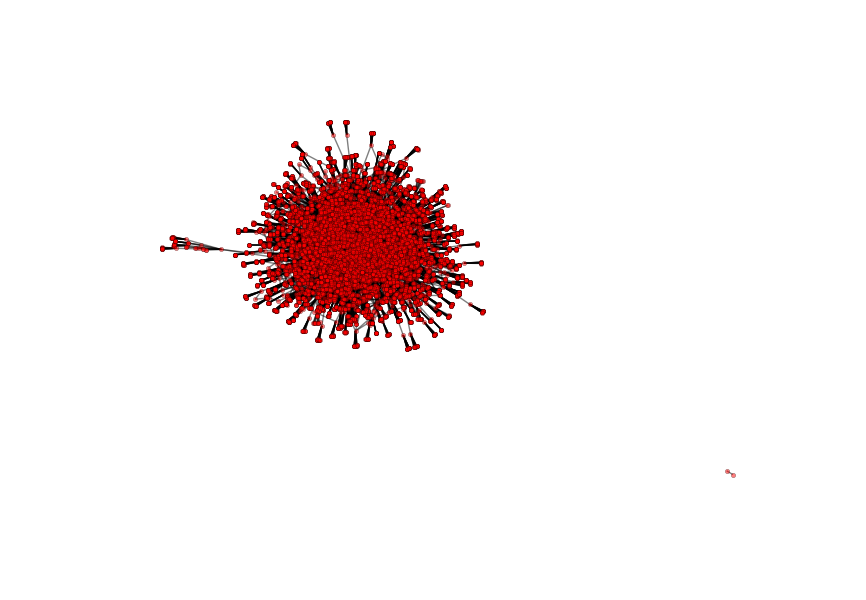

In [29]:
# Potential Influence Network
G = nx.from_numpy_matrix(adj_mat_followers)
nx.draw(G, alpha=.5, node_size=10, ed)
plt.show()
plt.savefig("chuck2_potential_influence_graph.pdf", dpi=1000)b

Well, that is useless!  Let's write it to GEFX and visualize it in Gephi...

In [30]:
nx.write_gexf(G, "potential_influence_chuck2.gexf")

In [1]:
from IPython.display import HTML
HTML('<iframe src=potential_influence_chuck2.png width=950 height=1000></iframe>')

# This is a lot better.  Here are some descriptive statistics about the network graph above:
- **Nodes**: 10190
- **Edges**: 12011
- **Network Diameter** = 12
        - Network diameter is simply the shortest distance between the two most distant nodes in the network.
- **Average Degree** = 2.357
        - Average degree is the average number of edges connected to each node.
- **Average Path Length** = 6.795
        - Average path length is the average number of steps along the shortest paths for all possible pairs of network nodes. It is a measure of the efficiency of information or mass transport on a network.

-------

# Stan Smith Product Launch Landscape

Here we display the Stan Smith product launch, which was a more successful product launch than the converse Chuck 2's. The idea behind this is to analyze the landscape in Twitter to see if these influence networks hold merit, or correlate to launch success

In [6]:
import pandas as pd

stan = pd.read_csv("stanUSA.csv", encoding = "ISO-8859-1")
print(stan.shape)
stan[:20]

(10000, 17)


,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following
0,722054756663820288,4/18/16 9:30,http://twitter.com/k_doyl/status/7220547566638...,RT @pilasaci Raf Simons x Adidas Stan Smith â...,@k_doyl,kaiu â¨,United States of America,Texas,Houston,Basic Neutral,Neutral,Twitter,42.0,NaN,5278,613,102
1,708438946158489600,3/11/16 18:46,http://twitter.com/casssbunnn/status/708438946...,"RT @ApparelPorn ""Adidas Stan Smith x Raf Simon...",@casssbunnn,cassbunn,United States of America,Nevada,Las Vegas,Basic Neutral,Neutral,Twitter,43.0,NaN,13168,510,649
2,727036046559596544,5/2/16 3:24,http://twitter.com/BolakDealsz/status/72703604...,Hot Clothing Offers : https://t.co/WCoA9fKVEU ...,@BolakDealsz,CLOTHING OFFERS,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,45.0,NaN,469880,447,56
3,720364337823518725,4/13/16 17:33,http://twitter.com/tylanmega/status/7203643378...,420 Bait Stan Smith's ??????????,@tylanmega,Lil' BounceBack,United States of America,California,San Francisco,Basic Positive,Joy,Twitter,44.0,F,19645,898,667
4,704925378612236288,3/2/16 2:04,http://twitter.com/negroloinci/status/70492537...,SneakerShouts: Another look at the Raf Simons ...,@negroloinci,Victor M Negron,United States of America,Florida,NaN,Basic Neutral,Neutral,Twitter,45.0,M,61426,387,731
5,713365427057991681,3/25/16 10:02,http://twitter.com/JoshCoffy/status/7133654270...,âExperience tells you what to do; confidence...,@JoshCoffy,Joshua Coffy,United States of America,Ohio,NaN,Basic Positive,Joy,Twitter,63.0,M,15775,70063,5652
6,710942746761158656,3/18/16 17:35,http://twitter.com/CooShoes/status/71094274676...,https://t.co/p4q3tdobAf Adidas Limited Edition...,@CooShoes,Ashley,United States of America,Missouri,St. Charles,Basic Neutral,Neutral,Twitter,46.0,F,512901,188,19
7,710164384966971393,3/16/16 14:02,http://twitter.com/TailoredSauce/status/710164...,https://t.co/OhzRVUOWLl RARE Adidas Adi-Color ...,@TailoredSauce,Harry,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,48.0,M,725513,278,1
8,720739533474631680,4/14/16 18:24,http://twitter.com/BalintCsoka/status/72073953...,RT @streethetics BAIT re-create the Adidas Ska...,@BalintCsoka,CsÃ­kos17â ï¸â¥ï¸â¦ï¸â£ï¸,United States of America,Nevada,Las Vegas,Basic Neutral,Neutral,Twitter,49.0,NaN,3636,5800,5850
9,723248708251463680,4/21/16 16:35,http://twitter.com/ModernOwners/status/7232487...,https://t.co/yIavPvFe3Q ADIDAS Originals Stan ...,@ModernOwners,Modern Owner,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,48.0,NaN,1246745,796,32


In [7]:
retweeted = []

# Default as a non-retweet, and then use the pattern
# of 'RT @user' to split the string and get the proper
# retweet status and user
for row in range(0, len(stan)):
    retweeted.append("")
    if stan['Contents'][row].split()[0] == "RT":
        retweeted[-1] = (stan['Contents'][row].split()[1])

stan['retweeted'] = retweeted
stan[:20]

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following,retweeted
0,722054756663820288,4/18/16 9:30,http://twitter.com/k_doyl/status/7220547566638...,RT @pilasaci Raf Simons x Adidas Stan Smith â...,@k_doyl,kaiu â¨,United States of America,Texas,Houston,Basic Neutral,Neutral,Twitter,42.0,NaN,5278,613,102,@pilasaci
1,708438946158489600,3/11/16 18:46,http://twitter.com/casssbunnn/status/708438946...,"RT @ApparelPorn ""Adidas Stan Smith x Raf Simon...",@casssbunnn,cassbunn,United States of America,Nevada,Las Vegas,Basic Neutral,Neutral,Twitter,43.0,NaN,13168,510,649,@ApparelPorn
2,727036046559596544,5/2/16 3:24,http://twitter.com/BolakDealsz/status/72703604...,Hot Clothing Offers : https://t.co/WCoA9fKVEU ...,@BolakDealsz,CLOTHING OFFERS,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,45.0,NaN,469880,447,56,
3,720364337823518725,4/13/16 17:33,http://twitter.com/tylanmega/status/7203643378...,420 Bait Stan Smith's ??????????,@tylanmega,Lil' BounceBack,United States of America,California,San Francisco,Basic Positive,Joy,Twitter,44.0,F,19645,898,667,
4,704925378612236288,3/2/16 2:04,http://twitter.com/negroloinci/status/70492537...,SneakerShouts: Another look at the Raf Simons ...,@negroloinci,Victor M Negron,United States of America,Florida,NaN,Basic Neutral,Neutral,Twitter,45.0,M,61426,387,731,
5,713365427057991681,3/25/16 10:02,http://twitter.com/JoshCoffy/status/7133654270...,âExperience tells you what to do; confidence...,@JoshCoffy,Joshua Coffy,United States of America,Ohio,NaN,Basic Positive,Joy,Twitter,63.0,M,15775,70063,5652,
6,710942746761158656,3/18/16 17:35,http://twitter.com/CooShoes/status/71094274676...,https://t.co/p4q3tdobAf Adidas Limited Edition...,@CooShoes,Ashley,United States of America,Missouri,St. Charles,Basic Neutral,Neutral,Twitter,46.0,F,512901,188,19,
7,710164384966971393,3/16/16 14:02,http://twitter.com/TailoredSauce/status/710164...,https://t.co/OhzRVUOWLl RARE Adidas Adi-Color ...,@TailoredSauce,Harry,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,48.0,M,725513,278,1,
8,720739533474631680,4/14/16 18:24,http://twitter.com/BalintCsoka/status/72073953...,RT @streethetics BAIT re-create the Adidas Ska...,@BalintCsoka,CsÃ­kos17â ï¸â¥ï¸â¦ï¸â£ï¸,United States of America,Nevada,Las Vegas,Basic Neutral,Neutral,Twitter,49.0,NaN,3636,5800,5850,@streethetics
9,723248708251463680,4/21/16 16:35,http://twitter.com/ModernOwners/status/7232487...,https://t.co/yIavPvFe3Q ADIDAS Originals Stan ...,@ModernOwners,Modern Owner,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,48.0,NaN,1246745,796,32,


In [7]:
# Getting the top ten individuals who were retweeted
stan_retweets = stan['retweeted']
frequencies = stan_retweets.value_counts()

top_stan_influencers = pd.DataFrame(frequencies)
top_stan_influencers[:10]

,retweeted
,4757
@ShoeByDooWop,346
@kicksonfire,311
@SneakerShouts,303
@AdidasGrid,300
@dapperdistress,183
@StudioCVM,154
@adidasalerts,153
@BaitMeCom,136
@HYPEBEAST,127


In [7]:
# Creating an adjacency matrix via cross-tabulation that shows the relationships between authors and people they
# retweeted
adj_df = pd.crosstab(stan['Author'],stan['retweeted'])
adj_df

retweeted,,@10KDeuce,@12amRun,@1985gallerycv,@1BirdsWorld,@1deep_forlife,@24_7_TNMRadio,@97__km,@9JABoy,@ALLKIX,...,@zFarbs7,@zapacamisetas,GotInstrumental:,KithSet,SOLELINKS,SneakerShouts,StreetwearDaiIy:,funkflex:,more_sneakers,thedropdate
Author,,,,,,,,,,,,,,,,,,,,,
@01ckelly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@026Shantal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@03252003D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@03Brayanm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@070Jay_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@078Irish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0Rob_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0fficial_j0sh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0niiii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
val = adj_df["@ShoeByDooWop"]
val.sum()

346

# GO OVER BELOW CODE; DO NOT THINK THIS IS CORRECT AND WAS IMPLEMENTED ABOVE FOR THE CHUCK 2S

In [7]:
# Get the names of the users that are both authors AND have had retweeted tweets
idx = adj_df.columns.union(adj_df.index)

# Reindex off of this and create an adjacency matrix. Set the columns and rows to 
# this idx name list to get a list showing who retweeted who
adj_df = adj_df.reindex(index = idx, columns = idx, fill_value = 0)
adj_df = adj_df.iloc[1:len(adj_df), 1:len(adj_df)]
adj_df

,@01ckelly,@026Shantal,@03252003D,@03Brayanm,@070Jay_,@078Irish,@0Rob_,@0fficial_j0sh,@0niiii,@1022krn,...,@zorradeplata,@zsturgeon7,GotInstrumental:,KithSet,SOLELINKS,SneakerShouts,StreetwearDaiIy:,funkflex:,more_sneakers,thedropdate
@01ckelly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@026Shantal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@03252003D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@03Brayanm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@070Jay_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@078Irish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0Rob_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0fficial_j0sh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0niiii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@1022krn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
val = adj_df.index.get_loc("@ShoeByDooWop")

maxi = 0
for row in range(0,len(adj_df)):
    val = adj_df.iloc[row].sum()
    if val > maxi:
        maxi = val

In [9]:
# See here how we have a different adjacency value than there were RTs for this user

maxi

36

# With our Top Influencers Analyzed, We can now Move on to Functional Analysis from the Twitter API using Tweepy as a Top-Layer of Access

In [8]:
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream
import tweepy as tp

# Create the authorized request channel so we can generate secure API calls
t = Twitter(auth=OAuth('951789582-lzVveHVf28iwx8AUjkpfVfceQEcz6goqAfZR2x8u',
                       'aHwBF0IEkDeiirONHTZWY5ITOwOIl73fpXWePjHLkO4Sm',
                       'WIW95vUzBKUyzAtZ7iOmlaTcn',
                       'mZcAkLqJCTZdRvfyGFjjGfi7jNtgngWjpSBqnlWgdGWDSZ2hqp'))

auth = tp.OAuthHandler('5NQ1ksSkw11Zyky1h0vReY32t','SmipeWuHCPnTOSDxNi9AMEkmPU7oQYjCia5I8uatLuHf5u6oBU')
auth.set_access_token('951789582-lzVveHVf28iwx8AUjkpfVfceQEcz6goqAfZR2x8u','aHwBF0IEkDeiirONHTZWY5ITOwOIl73fpXWePjHLkO4Sm')
api = tp.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
stan_klout = stan[stan["Klout Score"] > 65]
stan_klout

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following,retweeted
301,704734428468113408,3/1/16 13:25,http://twitter.com/wex1200/status/704734428468...,@hookedonjs @RACTVSHIFT @adidas not at all...#...,@wex1200,wex1200,United States of America,Oregon,Portland,Basic Neutral,Sadness,Twitter,67.0,NaN,45916,15264,853,
493,724230349644009472,4/24/16 9:35,http://twitter.com/Sports_Greats/status/724230...,Experience tells you what to do; confidence al...,@Sports_Greats,Sports Quotes,United States of America,NaN,NaN,Basic Positive,Joy,Twitter,71.0,NaN,54850,1206197,71806,
578,709637272082247680,3/15/16 3:08,http://twitter.com/freshnessmag/status/7096372...,Raf Simons Gives the adidas Stan Smith a Metal...,@freshnessmag,Freshness,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,79.0,NaN,54649,30298,261,
727,705103112206471168,3/2/16 13:50,http://twitter.com/Scripture_Truth/status/7051...,RT @AthIetesForGod Experience tells you what t...,@Scripture_Truth,Bible Scripture,United States of America,NaN,NaN,Basic Positive,Joy,Twitter,70.0,NaN,46142,711652,3482,@AthIetesForGod
746,714469705810120704,3/28/16 11:10,http://twitter.com/DEVCNY/status/7144697058101...,RT @theSTASHED ICYMI: Raf Simons and adidas Or...,@DEVCNY,DEV,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,66.0,NaN,13546,18073,9888,@theSTASHED
825,705938140301643776,3/4/16 21:09,http://twitter.com/SOLELINKS/status/7059381403...,Adidas Stan Smith 'Reflective' available for $...,@SOLELINKS,SOLE LINKS,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,67.0,NaN,42614,70468,354,
836,712859052905275392,3/24/16 0:30,http://twitter.com/ModernNotoriety/status/7128...,Fire Stan Smith x Raf Simons for the Spring ht...,@ModernNotoriety,Modern Notoriety,United States of America,Illinois,Chicago,Basic Neutral,Neutral,Twitter,66.0,NaN,53434,39786,475,
881,722885992705708033,4/20/16 16:33,http://twitter.com/FRlENDSreaction/status/7228...,"RT @AdidasGrid ""Adidas Stan Smith x Raf Simons...",@FRlENDSreaction,Fâ¢Râ¢Iâ¢Eâ¢Nâ¢Dâ¢S,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,67.0,NaN,3013,376205,12609,@AdidasGrid
909,710885263690436608,3/18/16 13:47,http://twitter.com/TheShoeGame/status/71088526...,Raf Simons x adidas Stan Smith\n\nAvailable: h...,@TheShoeGame,TheShoeGame.com,United States of America,Georgia,Atlanta,Basic Neutral,Neutral,Twitter,66.0,NaN,56491,109421,240,
964,718831326036697088,4/9/16 12:01,http://twitter.com/AthIetesForGod/status/71883...,Experience tells you what to do; confidence al...,@AthIetesForGod,Athletes For God,United States of America,NaN,NaN,Basic Positive,Joy,Twitter,68.0,NaN,36818,290969,78,


In [10]:
top_stan_klout = stan_klout[:26]
top_stan_klout

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following,retweeted
301,704734428468113408,3/1/16 13:25,http://twitter.com/wex1200/status/704734428468...,@hookedonjs @RACTVSHIFT @adidas not at all...#...,@wex1200,wex1200,United States of America,Oregon,Portland,Basic Neutral,Sadness,Twitter,67.0,NaN,45916,15264,853,
493,724230349644009472,4/24/16 9:35,http://twitter.com/Sports_Greats/status/724230...,Experience tells you what to do; confidence al...,@Sports_Greats,Sports Quotes,United States of America,NaN,NaN,Basic Positive,Joy,Twitter,71.0,NaN,54850,1206197,71806,
578,709637272082247680,3/15/16 3:08,http://twitter.com/freshnessmag/status/7096372...,Raf Simons Gives the adidas Stan Smith a Metal...,@freshnessmag,Freshness,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,79.0,NaN,54649,30298,261,
727,705103112206471168,3/2/16 13:50,http://twitter.com/Scripture_Truth/status/7051...,RT @AthIetesForGod Experience tells you what t...,@Scripture_Truth,Bible Scripture,United States of America,NaN,NaN,Basic Positive,Joy,Twitter,70.0,NaN,46142,711652,3482,@AthIetesForGod
746,714469705810120704,3/28/16 11:10,http://twitter.com/DEVCNY/status/7144697058101...,RT @theSTASHED ICYMI: Raf Simons and adidas Or...,@DEVCNY,DEV,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,66.0,NaN,13546,18073,9888,@theSTASHED
825,705938140301643776,3/4/16 21:09,http://twitter.com/SOLELINKS/status/7059381403...,Adidas Stan Smith 'Reflective' available for $...,@SOLELINKS,SOLE LINKS,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,67.0,NaN,42614,70468,354,
836,712859052905275392,3/24/16 0:30,http://twitter.com/ModernNotoriety/status/7128...,Fire Stan Smith x Raf Simons for the Spring ht...,@ModernNotoriety,Modern Notoriety,United States of America,Illinois,Chicago,Basic Neutral,Neutral,Twitter,66.0,NaN,53434,39786,475,
881,722885992705708033,4/20/16 16:33,http://twitter.com/FRlENDSreaction/status/7228...,"RT @AdidasGrid ""Adidas Stan Smith x Raf Simons...",@FRlENDSreaction,Fâ¢Râ¢Iâ¢Eâ¢Nâ¢Dâ¢S,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,67.0,NaN,3013,376205,12609,@AdidasGrid
909,710885263690436608,3/18/16 13:47,http://twitter.com/TheShoeGame/status/71088526...,Raf Simons x adidas Stan Smith\n\nAvailable: h...,@TheShoeGame,TheShoeGame.com,United States of America,Georgia,Atlanta,Basic Neutral,Neutral,Twitter,66.0,NaN,56491,109421,240,
964,718831326036697088,4/9/16 12:01,http://twitter.com/AthIetesForGod/status/71883...,Experience tells you what to do; confidence al...,@AthIetesForGod,Athletes For God,United States of America,NaN,NaN,Basic Positive,Joy,Twitter,68.0,NaN,36818,290969,78,


In [10]:
import tweepy
import numpy as np

top_klouts = list(stan_klout['Author'])
top_klouts = [name.strip("@") for name in top_klouts]

df = build_influence_network_df(list_of_being_followed = top_stan_klout, layers = 3)

Rate limit reached. Sleeping for: 462
Rate limit reached. Sleeping for: 892
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 888
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 892
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 886
Rate limit r

# This DF Below is JUNK 

In [14]:
df.to_csv('/Users/joshuasurette/Desktop/stanNet.csv')

df

,index,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
0,2,GUID,chriskikimorel,1406,fr,,102,29,843269983
1,10,GUID,guidouil,1043,fr,"Caen, France",453,36,19279480
2,1,Date (EST),ilovedorchester,9939,en,,0,20,2539909969
3,4,Date (EST),BU_Tweets,84478,en,"Boston, MA",2145,1235,104561488
4,15,Date (EST),daryldeluca,2108,en,"Boston, USA",4354,52,94440110
5,16,Date (EST),FoodPornAddicts,53301,en,,622,359,1433053748
6,18,Date (EST),collegeis2short,28741,en,,970,8,718644187
7,1,Contents,antoniovelardo_,25375,en,"Naples, FL",516,3081,2612887771
8,2,Contents,RealStrongfacts,58334,en,all over the world,3855,131,2837996969
9,6,Contents,tim_evans,1387,en,UK,7990,46,15986612


In [11]:
sorted_stan = stan_klout.sort_values('Klout Score', ascending=False)
sorted_stan[:8]

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following,retweeted
8424,719992253830340608,4/12/16 16:55,http://twitter.com/XXL/status/719992253830340608,"Stan Smith, Bait & adidas collab for special a...",@XXL,XXL Magazine,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,86.0,NaN,124329,951405,1170,
5064,723882913289396230,4/23/16 10:35,http://twitter.com/ochocinco/status/7238829132...,"That damn Chris Ruth, I couldn't believe the p...",@ochocinco,Chad Johnson,United States of America,NaN,NaN,Basic Negative,Neutral,Twitter,82.0,M,97432,3593408,6740,
7773,716978371331289088,4/4/16 9:18,http://twitter.com/WellandGoodNYC/status/71697...,Poll: Superga or Stan Smith? https://t.co/cj8G...,@WellandGoodNYC,Well + Good,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,81.0,NaN,28965,66585,1782,
3846,724930289445818368,4/26/16 7:57,http://twitter.com/HYPEBEAST/status/7249302894...,.@adidasoriginals applies a luxurious cotton-s...,@HYPEBEAST,HYPEBEAST,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,81.0,NaN,62849,338942,125,
9875,724489024069505025,4/25/16 2:43,http://twitter.com/HYPEBEAST/status/7244890240...,.@adidasoriginals drops an exotic iteration of...,@HYPEBEAST,HYPEBEAST,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,81.0,NaN,62777,338689,125,
2720,720982530695016453,4/15/16 10:30,http://twitter.com/HYPEBEAST/status/7209825306...,.@BaitMeCom & @adidas serve up a vulcanized St...,@HYPEBEAST,HYPEBEAST,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,81.0,NaN,62367,335801,125,
4049,711435917064609792,3/20/16 2:15,http://twitter.com/HYPEBEAST/status/7114359170...,RT @hype_bae The @adidasoriginals Stan Smith a...,@HYPEBEAST,HYPEBEAST,United States of America,NaN,NaN,Basic Neutral,Neutral,Twitter,80.0,NaN,61196,329483,125,@hype_bae
3345,717126110585053184,4/4/16 19:06,http://twitter.com/HotNewHipHop/status/7171261...,The Stan Smith just got its biggest upgrade ye...,@HotNewHipHop,HotNewHipHop,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,80.0,NaN,100464,643159,993,


In [12]:
top_5_stan = sorted_stan['Author'].unique()[:5]
top_5_stan = list(top_5_stan)
top_5_stan

['@XXL', '@ochocinco', '@WellandGoodNYC', '@HYPEBEAST', '@HotNewHipHop']

# Building the Individual Networks

In [80]:
import tweepy

df_XXL = build_influence_network_df(list_of_being_followed = [top_5_stan[0]], layers = 3)

ValueError: No objects to concatenate

In [18]:
df_Ocho = build_influence_network_df(list_of_being_followed = [top_5_stan[1]], layers = 3)

Rate limit reached. Sleeping for: 867


In [19]:
df_Ocho

,index,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
0,6,@ochocinco,Teacloc,33122,en,"Connecticut, USA",3702,142,2726854313
1,10,@ochocinco,MorganBagg,13274,en,Baltimore || DC,8944,47,127743305
2,17,@ochocinco,BaqerAlzerkaney,1627,ar,Iraq,709,0,808948405884035073
3,0,Teacloc,FPSMontageYT,1326,en,,2,1,772724550509264896
4,2,Teacloc,vitalyg,3821,en,San Francisco/Europe,1337,237,13566252
5,5,Teacloc,LarryThePMGuy,6674,en,"San Francisco, CA",15850,117,775446847926042624
6,7,Teacloc,StartupGrind,549804,en,"Palo Alto, CA",28694,5058,108698830
7,9,Teacloc,CoriGrovesq,1262,en,,387,1,788334775476097024
8,10,Teacloc,Psit_vatsal,2174,en,India,5113,2,2273347459
9,12,Teacloc,Vinl_XD,1770,en,Hong Kong,5,2,850252195886907394


In [20]:
df_Well = build_influence_network_df(list_of_being_followed = [top_5_stan[2]], layers = 3)

Rate limit reached. Sleeping for: 609
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 888
Rate limit reached. Sleeping for: 888


In [21]:
df_Well

,index,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
0,2,@WellandGoodNYC,CerianJenkins,18500,en,"London, England",4915,209,208524001
1,9,@WellandGoodNYC,AWalble,7600,en,,45470,28,3140935863
2,11,@WellandGoodNYC,HALFPOPS,4048,en,At Your Local Grocery Store,653,73,266203160
3,13,@WellandGoodNYC,EdithBSears2,2728,en,,10935,21,726003833436921858
4,17,@WellandGoodNYC,KaidanJamesRose,4304,en,Honeymoon Avenue,107,5,783814809133260800
5,0,CerianJenkins,WendyLynnJH,2639,en,"California, USA",10094,6,189019490
6,1,CerianJenkins,Freeyourmindkid,27380,en,Tsar-A-Lago,43223,220,120995738
7,3,CerianJenkins,kazamaMUSIC,1446,ja,京都市 上京区⇐⇒東京,242,1,3647619313
8,4,CerianJenkins,eileenawolter,1436,en,earth,7978,108,102807025
9,6,CerianJenkins,AdamParkhomenko,132396,en,✈️🚅🚙,35606,1320,18382184


In [22]:
df_HYPE = build_influence_network_df(list_of_being_followed = [top_5_stan[3]], layers = 3)

Rate limit reached. Sleeping for: 662
Rate limit reached. Sleeping for: 888


In [23]:
df_HYPE

,index,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
0,6,@HYPEBEAST,CodeineCamp,16937,en,$ecret Location,17022,38,508429563
1,15,@HYPEBEAST,TommyLWright59,9712,en,"Southfield, MI/Detroit, MI",2372,17,2510564538
2,0,CodeineCamp,Yeezys_Release,30993,en,,13,0,734673085790461952
3,1,CodeineCamp,IceyVibes,17063,en,TURN MY NOTIFICATIONS ON 🤙🏽,4412,134,2203248721
4,2,CodeineCamp,StashUKBeats,39625,en,"London, U.K.",84,87,246471629
5,3,CodeineCamp,montekeepit100,4841,en,"Sacramento, CA",247,1,1416693080
6,4,CodeineCamp,MURCHEIST,11051,en,"Bessemer,AL",22,5,100349468
7,5,CodeineCamp,LilT_Rin,2256,en,"Chicago, IL",159,4,4860146470
8,7,CodeineCamp,300REZ,107242,en,Derb,13010,152,205561923
9,9,CodeineCamp,LowkeyLew,1205,en,"Miami, FL",8780,12,526159744


In [24]:
df_HipHop = build_influence_network_df(list_of_being_followed = [top_5_stan[4]], layers = 3)

Rate limit reached. Sleeping for: 659


In [25]:
df_HipHop

,index,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
0,0,@HotNewHipHop,EZZYSUMSERIOUS,12535,en,"Shreveport, LA",376,13,2371448568
1,14,@HotNewHipHop,depewsgentleman,1207,en,United States,23201,11,310554295
2,1,EZZYSUMSERIOUS,ToreyJaRon,1103,en,"Tallahassee, FL",24,7,39156953
3,5,EZZYSUMSERIOUS,jehlonii,2619,en,,9165,2,4560596412
4,7,EZZYSUMSERIOUS,TheFlirtDude143,149885,en,Cross Globe Media,941,71,489959553
5,8,EZZYSUMSERIOUS,Inspiring_Them,12891,en-gb,,10931,12,2999324461
6,9,EZZYSUMSERIOUS,jiggabeatz,19733,de,,2447,62,204024587
7,10,EZZYSUMSERIOUS,Snvime,17634,en,Libya,3870,24,1963101450
8,11,EZZYSUMSERIOUS,nareshk46306787,1006,en,"Faridabad, India",37370,6,2399092800
9,12,EZZYSUMSERIOUS,bestgoodsaying,29596,en,,6283,50,1029877729


In [104]:
num_edges = []
avg_degree = []
diameter = []
nodes = []
center = []

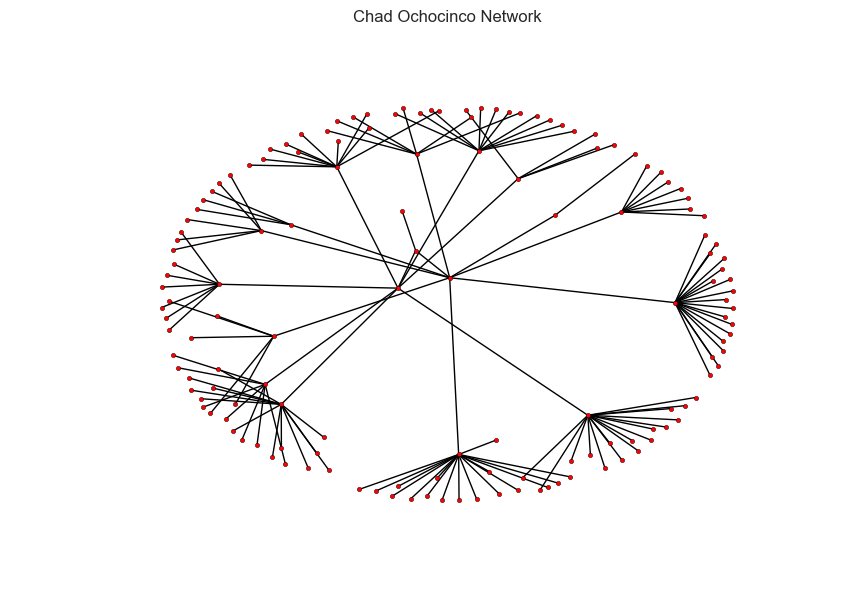

In [107]:
import networkx as nx

G = nx.from_pandas_dataframe(df_Ocho, source='being_followed', target='followed_by')
nx.draw(G, node_size=10)
plt.title('Chad Ochocinco Network')
plt.show()

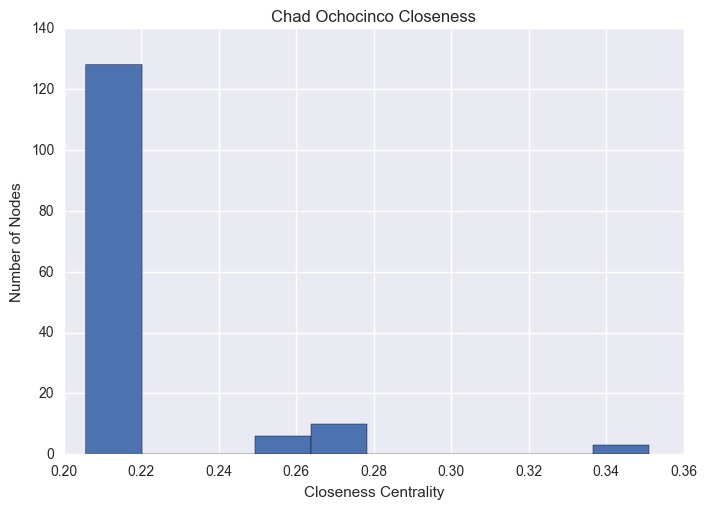

In [58]:
cent = np.array(list(nx.closeness_centrality(G).values()))

plt.hist(cent)#,bins=np.linspace(0,1,20))

plt.xlabel('Closeness Centrality')
_=plt.ylabel('Number of Nodes')
plt.title('Chad Ochocinco Closeness')
plt.show()

In [109]:
center.append(nx.center(G)[0])
num_edges.append(G.number_of_edges())
diameter.append(nx.diameter(G))
nodes.append(G.number_of_nodes())

degree = nx.degree(G)
count = 0 
sum = 0

for key in degree:
    count+=1
    sum+=degree[key]
    
avg_degree.append(sum/count)

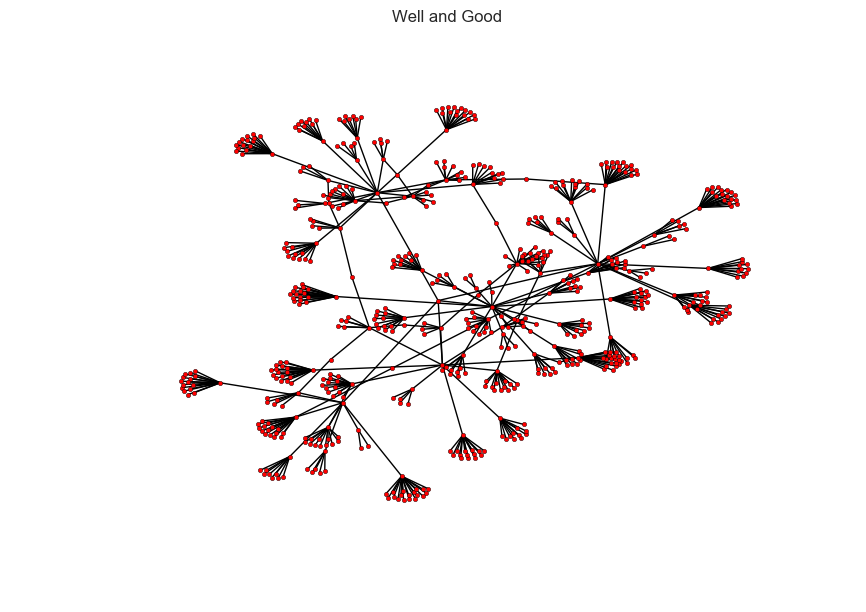

In [143]:
G = nx.from_pandas_dataframe(df_Well, source='being_followed', target='followed_by')
nx.draw(G, node_size=10)
plt.title('Well and Good')
plt.show()

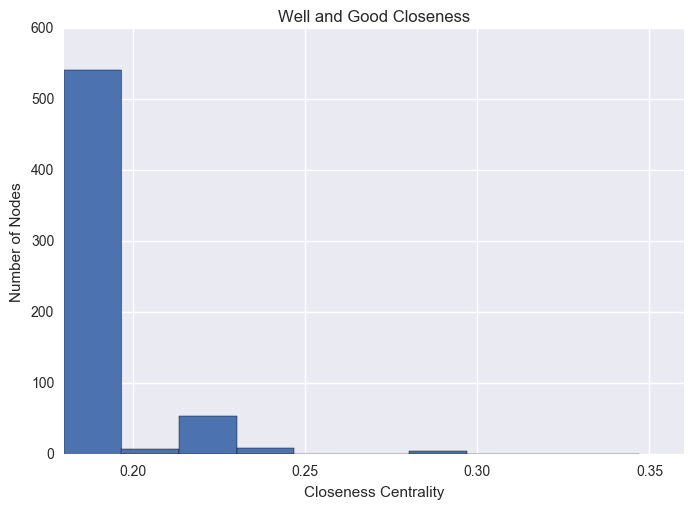

In [62]:
cent = np.array(list(nx.closeness_centrality(G).values()))

plt.hist(cent)#,bins=np.linspace(0,1,20))

plt.xlabel('Closeness Centrality')
_=plt.ylabel('Number of Nodes')
plt.title('Well and Good Closeness')
plt.show()

In [111]:
center.append(nx.center(G)[0])
num_edges.append(G.number_of_edges())
diameter.append(nx.diameter(G))
nodes.append(G.number_of_nodes())

degree = nx.degree(G)
count = 0 
sum = 0

for key in degree:
    count+=1
    sum+=degree[key]
    
avg_degree.append(sum/count)

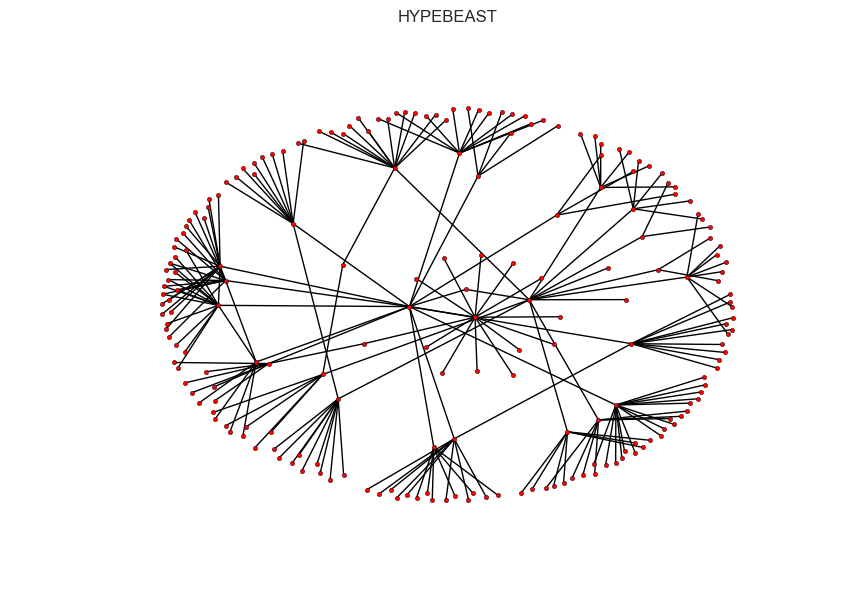

In [144]:
G = nx.from_pandas_dataframe(df_HYPE, source='being_followed', target='followed_by')
nx.draw(G, node_size=10)
plt.title('HYPEBEAST')
plt.show()

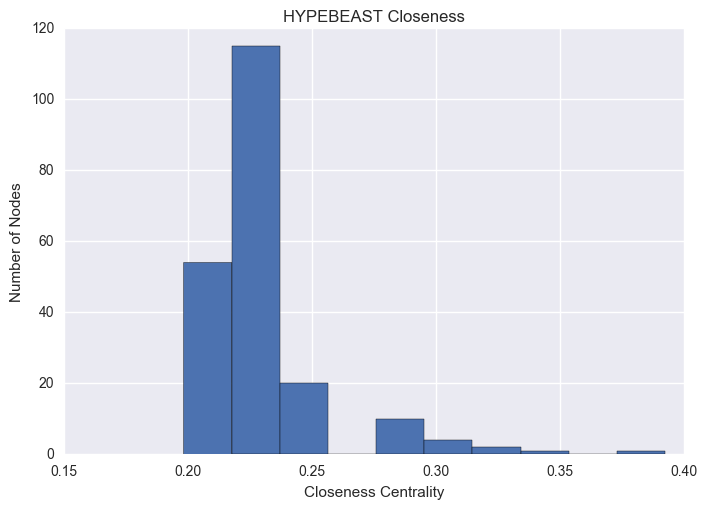

In [67]:
cent = np.array(list(nx.closeness_centrality(G).values()))

plt.hist(cent)#,bins=np.linspace(0,1,20))

plt.xlabel('Closeness Centrality')
_=plt.ylabel('Number of Nodes')
plt.title('HYPEBEAST Closeness')
plt.show()

In [113]:
center.append(nx.center(G)[0])
num_edges.append(G.number_of_edges())
diameter.append(nx.diameter(G))
nodes.append(G.number_of_nodes())

degree = nx.degree(G)
count = 0 
sum = 0

for key in degree:
    count+=1
    sum+=degree[key]
    
avg_degree.append(sum/count)

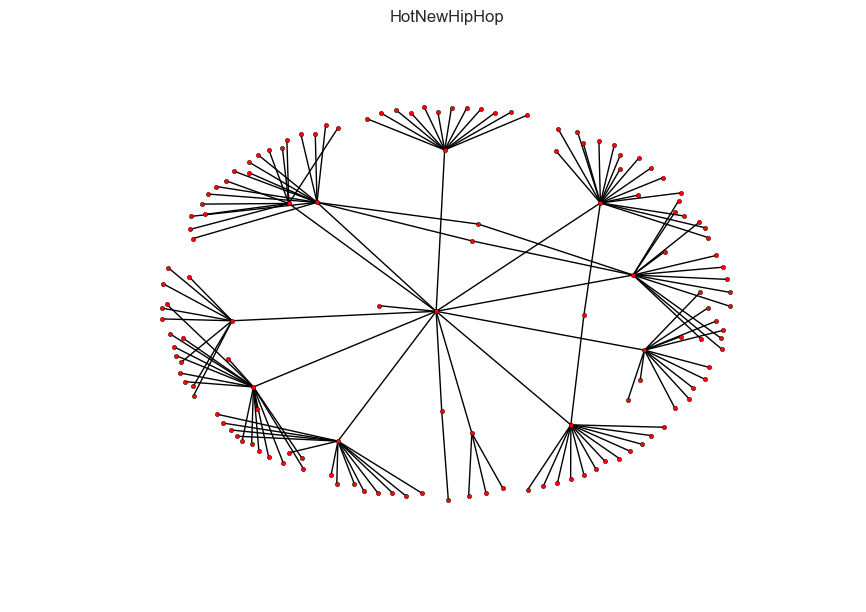

In [146]:
G = nx.from_pandas_dataframe(df_HipHop, source='being_followed', target='followed_by')
nx.draw(G, node_size=10)
plt.title('HotNewHipHop')
plt.show()

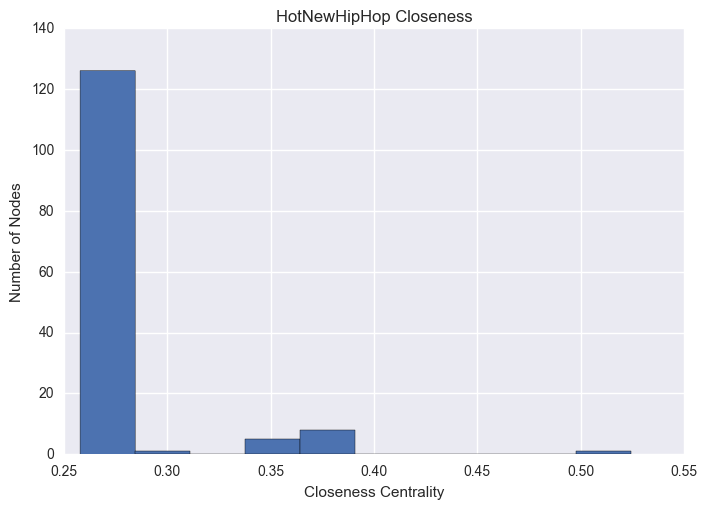

In [76]:
cent = np.array(list(nx.closeness_centrality(G).values()))

plt.hist(cent)#,bins=np.linspace(0,1,20))

plt.xlabel('Closeness Centrality')
_=plt.ylabel('Number of Nodes')
plt.title('HotNewHipHop Closeness')
plt.show()

In [116]:
center.append(nx.center(G)[0])
num_edges.append(G.number_of_edges())
diameter.append(nx.diameter(G))
nodes.append(G.number_of_nodes())

degree = nx.degree(G)
count = 0 
sum = 0

for key in degree:
    count+=1
    sum+=degree[key]
    
avg_degree.append(sum/count)

In [157]:
df = pd.DataFrame(columns=['Brand','User','Klout','Followers','Center','Nodes','Edges','Diameter','Average_Degree'])



In [158]:
df['Center'] = pd.Series(center)
df['Nodes'] = pd.Series(nodes)
df['Edges'] = pd.Series(num_edges)
df['Diameter'] = pd.Series(diameter)
df['Average_Degree'] = pd.Series(avg_degree)
df['Brand'] = ['StanSmith','StanSmith','StanSmith','StanSmith']
df['User'] = pd.Series(top_5_stan[1:])
df['Klout'] = [82,81,81,80]
df['Followers'] = [3593408,66585,338942,643159]
df

,Brand,User,Klout,Followers,Center,Nodes,Edges,Diameter,Average_Degree
0,StanSmith,@ochocinco,82,3593408,@ochocinco,147,146,6,1.986395
1,StanSmith,@WellandGoodNYC,81,66585,@WellandGoodNYC,617,637,6,2.064830
2,StanSmith,@HYPEBEAST,81,338942,@HYPEBEAST,207,219,6,2.115942
3,StanSmith,@HotNewHipHop,80,643159,EZZYSUMSERIOUS,141,143,4,2.028369


In [155]:
stan_klout[stan_klout['Author'] == '@HotNewHipHop']

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following,retweeted
3345,717126110585053184,4/4/16 19:06,http://twitter.com/HotNewHipHop/status/7171261...,The Stan Smith just got its biggest upgrade ye...,@HotNewHipHop,HotNewHipHop,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,80.0,NaN,100464,643159,993,
7220,717076793144913920,4/4/16 15:50,http://twitter.com/HotNewHipHop/status/7170767...,.@adidas gives the Stan Smith a Primeknit look...,@HotNewHipHop,HotNewHipHop,United States of America,New York,New York,Basic Neutral,Neutral,Twitter,80.0,NaN,100429,643075,993,
